In [2]:
import numpy as np 
import pandas as pd

In [3]:
my_data = pd.read_csv("Customer.csv", delimiter=",")
my_data[0:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
my_data['Sex'] = np.where(my_data['Gender'] == 'Male', 1, 0)
my_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [5]:
X = my_data[['Sex', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X[0:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]])

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit(X).transform(X)

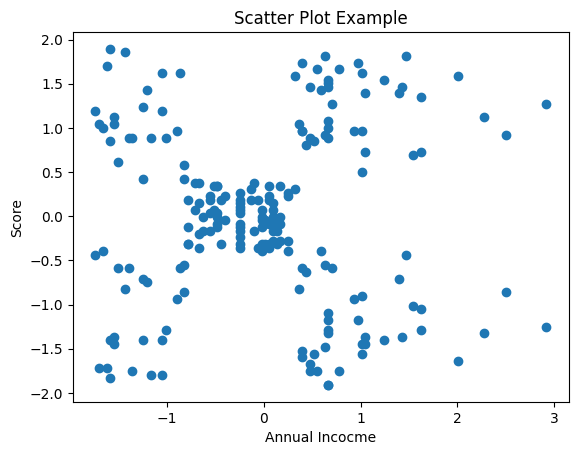

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:,2], X[:,3])

plt.title("Scatter Plot Example")
plt.xlabel("Annual Incocme")
plt.ylabel("Score")

plt.show()

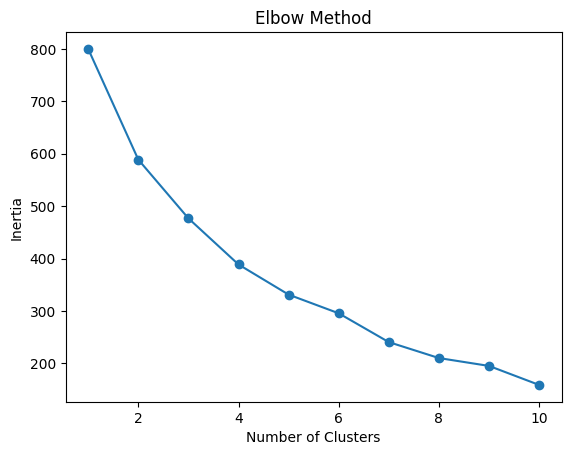

In [8]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [9]:
number_of_clusters = 8
kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=0).fit(X)
kmeanslabels = kmeans.labels_
kmeanscounts = np.bincount(kmeanslabels)
for i, count in enumerate(kmeanscounts):
    print(f"کلاستر {i}: {count} عضو")

کلاستر 0: 27 عضو
کلاستر 1: 41 عضو
کلاستر 2: 18 عضو
کلاستر 3: 24 عضو
کلاستر 4: 15 عضو
کلاستر 5: 21 عضو
کلاستر 6: 22 عضو
کلاستر 7: 32 عضو


In [10]:
from sklearn.metrics import silhouette_score
KMeans_score = silhouette_score(X, kmeanslabels)
print(f"KMeans Silhouette Score: {KMeans_score:.3f}")

KMeans Silhouette Score: 0.367


In [11]:
from sklearn.cluster import AgglomerativeClustering
AggClusterNumber = 8
AggCluster = AgglomerativeClustering(n_clusters = AggClusterNumber, linkage = 'average').fit(X)
AggLabels = AggCluster.labels_
Aggcounts = np.bincount(AggLabels)
for i, count in enumerate(Aggcounts):
    print(f"کلاستر {i}: {count} عضو")

کلاستر 0: 27 عضو
کلاستر 1: 20 عضو
کلاستر 2: 18 عضو
کلاستر 3: 32 عضو
کلاستر 4: 44 عضو
کلاستر 5: 23 عضو
کلاستر 6: 15 عضو
کلاستر 7: 21 عضو


In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# محاسبه ماتریس فاصله
dist_matrix = pdist(X, metric='euclidean')  # فقط upper triangle لازم داریم

# ساخت linkage matrix از ماتریس فاصله
linkage_matrix = sch.linkage(dist_matrix, method='complete')

# رسم Dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram Based on Distance Matrix")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.grid(True)
output_path = "dendrogram.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

Agg_score = silhouette_score(X, AggLabels)
print(f"Agglomerative Silhouette Score: {Agg_score:.3f}")

Agglomerative Silhouette Score: 0.381


In [13]:
from sklearn.cluster import DBSCAN
DBSCAN_Epsilon = 1
DBSCAN_Min = 3
DBSCANClustering = DBSCAN(eps = DBSCAN_Epsilon, min_samples = DBSCAN_Min).fit(X)
DBSCANLabels = DBSCANClustering.labels_
set (DBSCANLabels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [14]:
import numpy as np

unique_labels = set(DBSCANLabels)

for label in unique_labels:
    DBSCAN_count = np.sum(DBSCANLabels == label)
    if label == -1:
        print(f"نویز (Noise): {DBSCAN_count} نقطه")
    else:
        print(f"کلاستر {label}: {DBSCAN_count} عضو")

کلاستر 0: 77 عضو
کلاستر 1: 111 عضو
کلاستر 2: 4 عضو
نویز (Noise): 8 نقطه


In [15]:
from sklearn.metrics import silhouette_score

mask = DBSCANLabels != -1

if len(set(DBSCANLabels[mask])) > 1:
    DBSCAN_score = silhouette_score(X[mask], DBSCANLabels[mask])
    print(f"Silhouette Score (بدون نویز): {DBSCAN_score:.3f}")
else:
    print("برای محاسبه Silhouette حداقل دو خوشه لازم است.")

Silhouette Score (بدون نویز): 0.236


In [17]:
Scores = {
    'KMeans': KMeans_score,
    'Agglomerative': Agg_score,
    'DBSCAN': DBSCAN_score
}

best_method = None
best_score = -1 

for method, score in Scores.items():
    if score > best_score:
        best_score = score
        best_method = method

print(f"بهترین روش: {best_method} با نمره: {best_score:.3f}")

بهترین روش: Agglomerative با نمره: 0.381
